In [1]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas_datareader as pdf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
fed_data1 = pdf.get_data_fred(['UNRATE', 'FEDFUNDS', 'INDPRO'])

In [10]:
fed_data1.describe()

,UNRATE,FEDFUNDS,INDPRO
count,59.000000,59.000000,59.000000
mean,5.047458,1.063220,100.375137
std,2.321070,0.904785,3.910134
min,3.500000,0.050000,84.201800
25%,3.800000,0.090000,99.727000
50%,4.100000,1.150000,101.356100
75%,5.600000,1.870000,102.613550
max,14.700000,2.420000,104.585300


In [5]:
import statsmodels.formula.api as smf

In [6]:
reg1='INDPRO~UNRATE+FEDFUNDS'

In [7]:
reg1output=smf.ols(reg1, fed_data1).fit()

In [8]:
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     249.3
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.31e-28
Time:                        12:55:14   Log-Likelihood:                -96.020
No. Observations:                  59   AIC:                             198.0
Df Residuals:                      56   BIC:                             204.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.2636      0.635    170.419      0.0

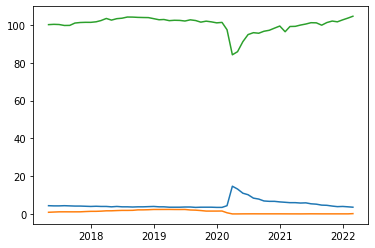

In [9]:
plt.plot(fed_data1)

In [132]:
fed_data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-05-01 to 2022-03-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UNRATE    59 non-null     float64
 1   FEDFUNDS  59 non-null     float64
 2   INDPRO    59 non-null     float64
dtypes: float64(3)
memory usage: 3.9 KB


In [128]:
covid_data = pd.read_csv('covid.csv', sep = ',')
covid_df = pd.DataFrame(covid_data).set_index('DATE')

In [129]:
covid_df.index = pd.to_datetime(covid_df.index)

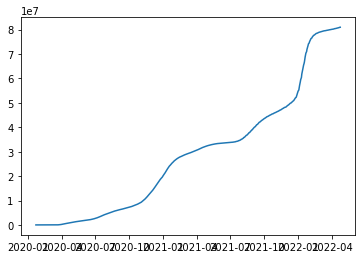

In [130]:
plt.plot(covid_df)

In [131]:
covid_df.index.name = 'DATE'
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 824 entries, 2020-01-22 to 2022-04-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  824 non-null    int64
dtypes: int64(1)
memory usage: 12.9 KB


In [136]:
merge_df = [fed_data1, covid_df]
new_df = covid_df.merge(fed_data1, left_index=True, right_index=True)

In [150]:
new_df.head()

,Confirmed,UNRATE,FEDFUNDS,INDPRO
DATE,,,,
2020-02-01,8,3.5,1.58,101.3247
2020-03-01,32,4.4,0.65,97.4477
2020-04-01,223254,14.7,0.05,84.2018
2020-05-01,1111409,13.2,0.05,85.8434
2020-06-01,1806075,11.0,0.08,91.1622


In [144]:
reg2 = 'INDPRO~UNRATE+FEDFUNDS+Confirmed'

In [148]:
reg2output=smf.ols(reg2, new_df).fit()

In [149]:
print(reg2output.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.32e-13
Time:                        16:31:54   Log-Likelihood:                -40.994
No. Observations:                  26   AIC:                             89.99
Df Residuals:                      22   BIC:                             95.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.0985      1.506     71.131      0.0